# 4.0 EDA - Exploratory Data Analysis

Objetivos
1. Ganhar experiência de Negócio
2. Validar hipóteses de Negócio (Insights)
    - Surpresa, novas informações
    - Refutação de crenças estabelecidas
3. Perceber quais variáveis serão relevantes para o modelo.

In [43]:
df4 = pd.read_pickle('df3.pkl')

## 4.1 Análise Univariada

### 4.1.1 Target (Class)
final output you are trying to predict

<AxesSubplot:xlabel='sales', ylabel='Density'>

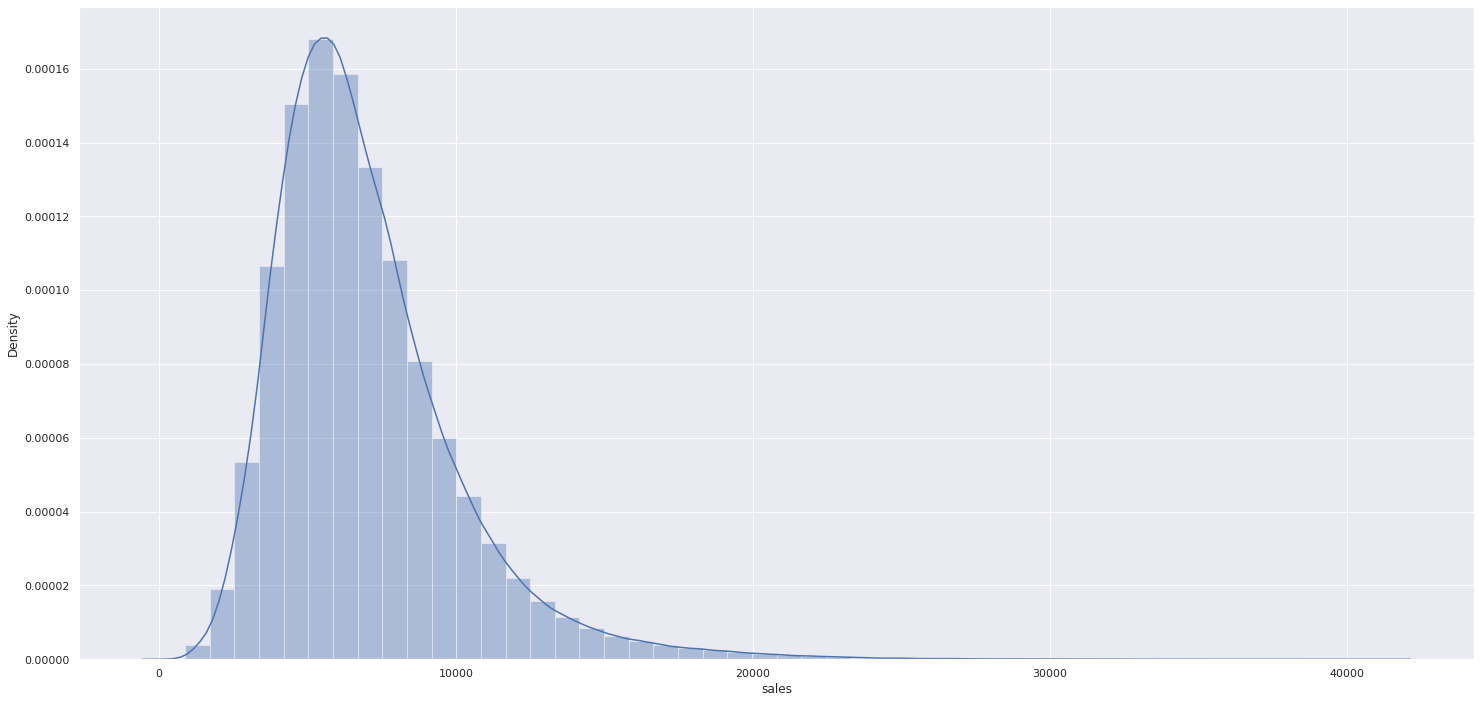

In [44]:
sns.distplot( df4['sales'] )

Algumas das premissas dos modelos de ML é de que os dados sejam:
* Independentes
* Normalmente Distribuidos

Então, como observamos aqui um deslocamento à esquerda dessa distribuição, temos que seria ideal aplicar alguma transformação para deixar a distribuição mais próxima da distribuição normal. Exemplos de transformações são logarítmica ou exponencial.

### 4.1.2 Number Variable

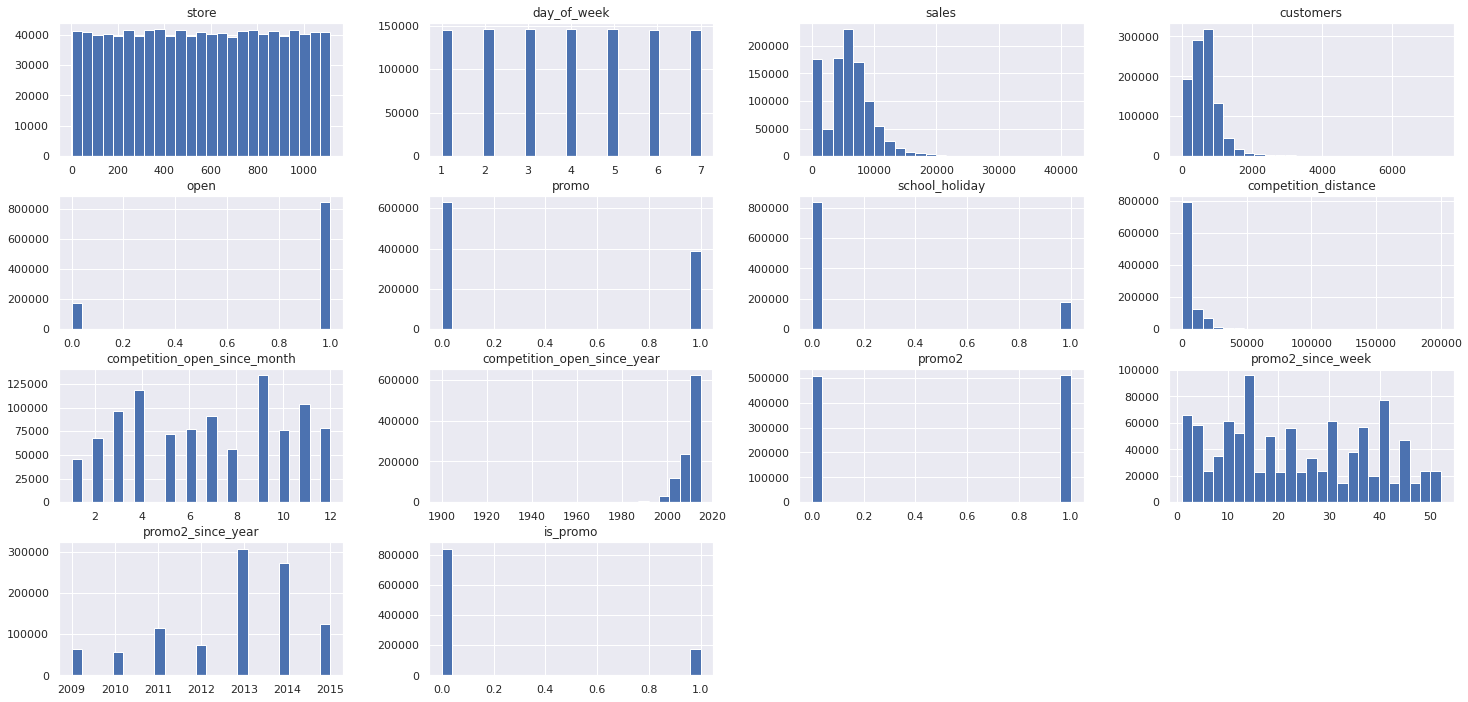

In [45]:
num_attributes.hist( bins= 25 );

### 4.1.3 Category Variable

In [46]:
cat_attributes.head()

,state_holiday,store_type,assortment,promo_interval,month_map
0,0,c,a,0,Jul
1,0,a,a,"Jan,Apr,Jul,Oct",Jul
2,0,a,a,"Jan,Apr,Jul,Oct",Jul
3,0,c,c,0,Jul
4,0,a,a,0,Jul


In [47]:
df4[ 'state_holiday' ].drop_duplicates()

0            regular_day
63559     public_holiday
129424    easter_holiday
241126         christmas
Name: state_holiday, dtype: object

In [48]:
df4[ 'store_type' ].drop_duplicates()

0     c
1     a
12    d
84    b
Name: store_type, dtype: object

In [49]:
df4[ 'assortment' ].drop_duplicates()

0         basic
3      extended
258       extra
Name: assortment, dtype: object

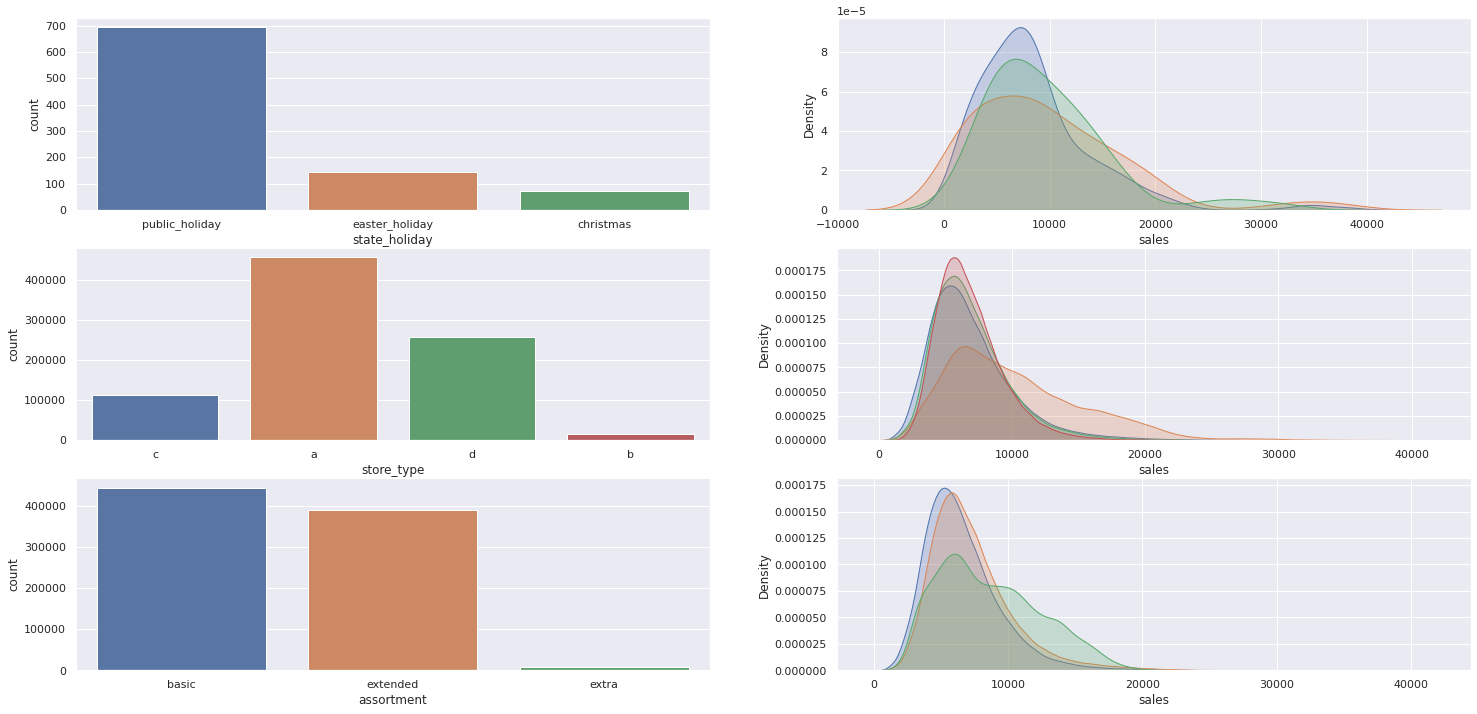

In [50]:
# state_holiday
# preciso filtrar o dias normais pois eles são em muito maior quantidade
a = df4[df4['state_holiday'] != 'regular_day']

# criando um grid matplotlib
plt.subplot( 3, 2, 1 )
sns.countplot( a[ 'state_holiday' ] )

plt.subplot( 3, 2, 2 )
sns.kdeplot( df4[df4['state_holiday'] == 'public_holiday']['sales'], label='public_holiday', shade = True )
sns.kdeplot( df4[df4['state_holiday'] == 'easter_holiday']['sales'], label='easter_holiday', shade = True )
sns.kdeplot( df4[df4['state_holiday'] == 'christmas']['sales'], label='christmas', shade = True );

# store_type
# criando um grid matplotlib
plt.subplot( 3, 2, 3 )
sns.countplot( df4[ 'store_type' ] )

plt.subplot( 3, 2, 4 )
sns.kdeplot( df4[df4['store_type'] == 'a']['sales'], label='a', shade = True )
sns.kdeplot( df4[df4['store_type'] == 'b']['sales'], label='b', shade = True )
sns.kdeplot( df4[df4['store_type'] == 'c']['sales'], label='c', shade = True )
sns.kdeplot( df4[df4['store_type'] == 'd']['sales'], label='d', shade = True );

# assortment
# criando um grid matplotlib
plt.subplot( 3, 2, 5 )
sns.countplot( df4[ 'assortment' ] )

plt.subplot( 3, 2, 6 )
sns.kdeplot( df4[df4['assortment'] == 'basic']['sales'], label='basic', shade = True )
sns.kdeplot( df4[df4['assortment'] == 'extended']['sales'], label='extended', shade = True )
sns.kdeplot( df4[df4['assortment'] == 'extra']['sales'], label='extra', shade = True );

## 4.2 Análise Bivariada

### H1. Lojas com maior sortimento deveriam vender mais
***FALSA** Lojas com MAIOR SORTIMENTO vendem MENOS

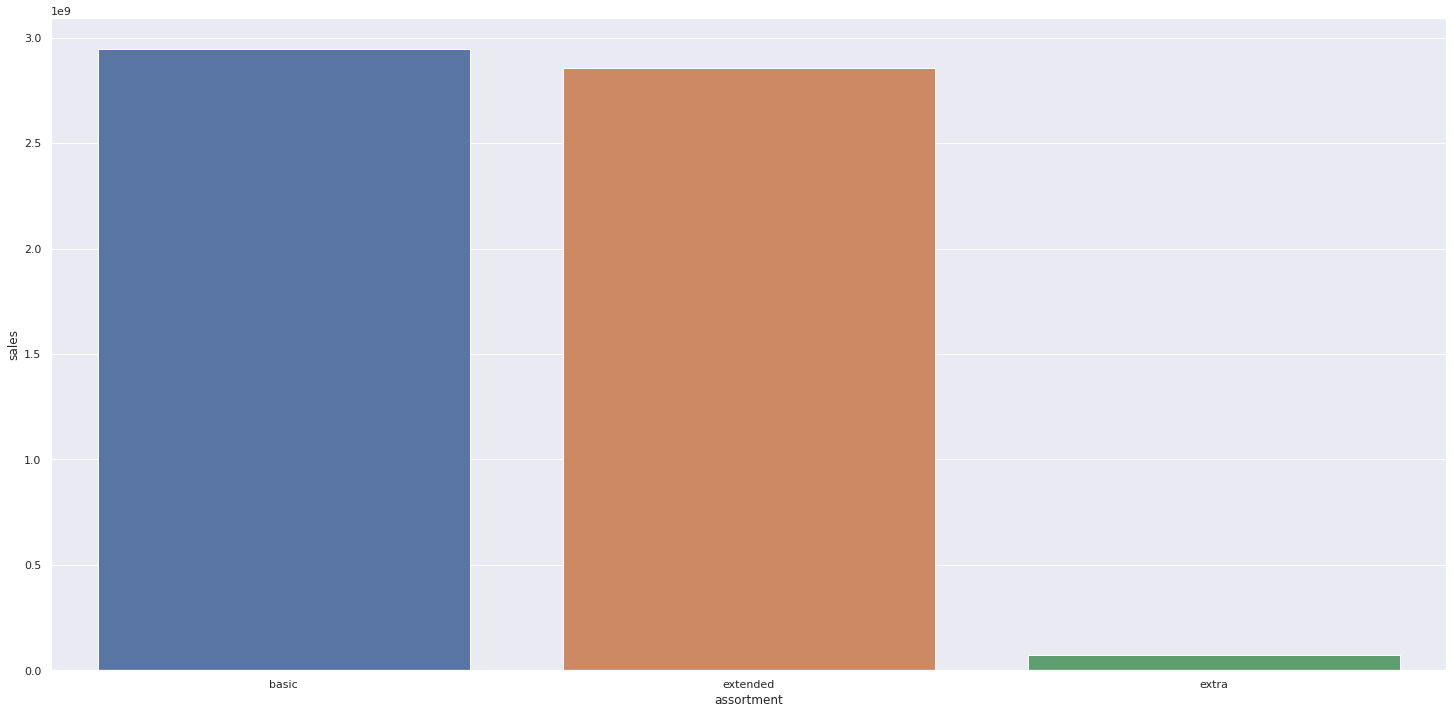

In [51]:
aux1 = df4[['assortment', 'sales']].groupby( 'assortment' ).sum().reset_index()
sns.barplot( x='assortment', y='sales', data=aux1 );

In [52]:
aux2 = df4[['year_week', 'assortment', 'sales']].groupby( ['year_week','assortment'] ).sum().reset_index()
aux2.head()

,year_week,assortment,sales
0,2013-00,basic,13434262
1,2013-00,extended,12425669
2,2013-00,extra,269404
3,2013-01,basic,26007250
4,2013-01,extended,22917693


In [53]:
aux3 = aux2.pivot( index='year_week', columns='assortment', values='sales' )
aux3.head()

assortment,basic,extended,extra
year_week,,,
2013-00,13434262,12425669,269404
2013-01,26007250,22917693,350279
2013-02,17970974,16029584,377207
2013-03,24392076,21243431,404662
2013-04,19972891,18130077,363061


<AxesSubplot:xlabel='year_week'>

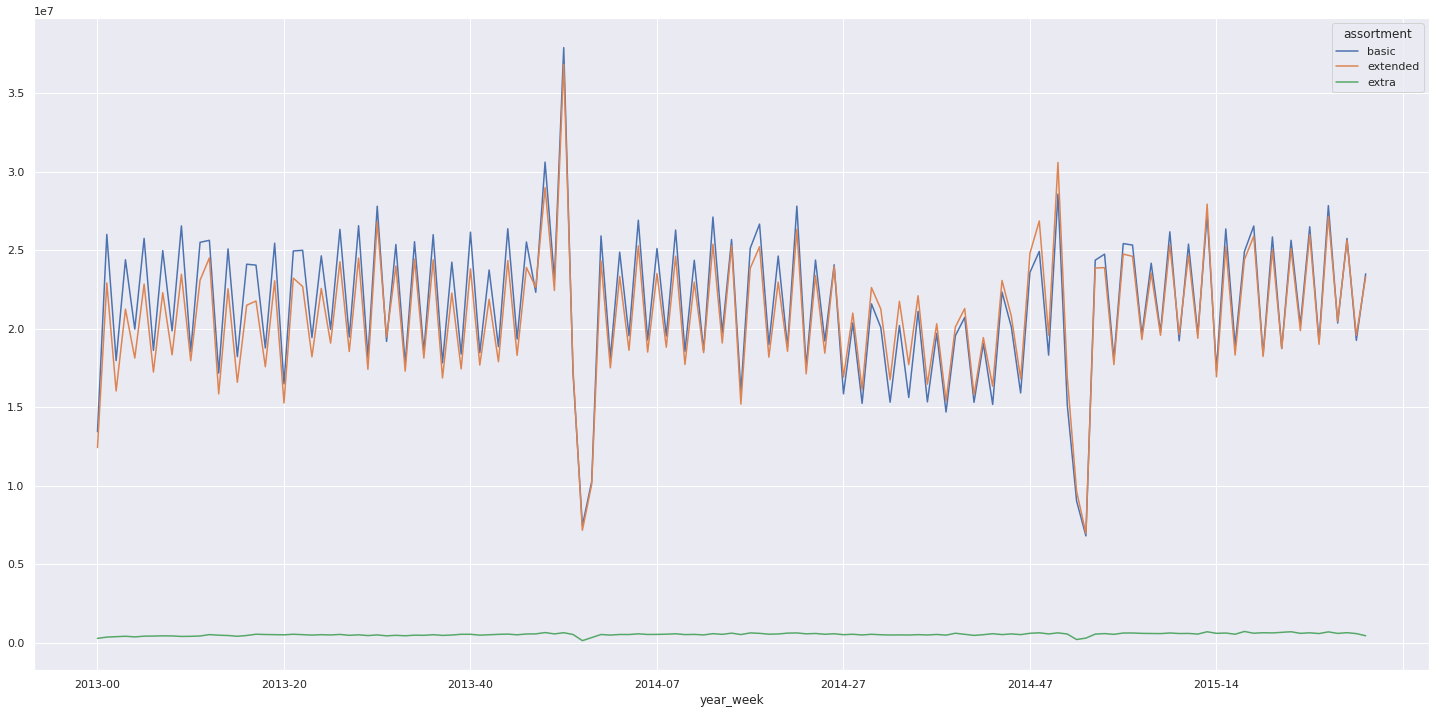

In [54]:
aux3.plot()

<AxesSubplot:xlabel='year_week'>

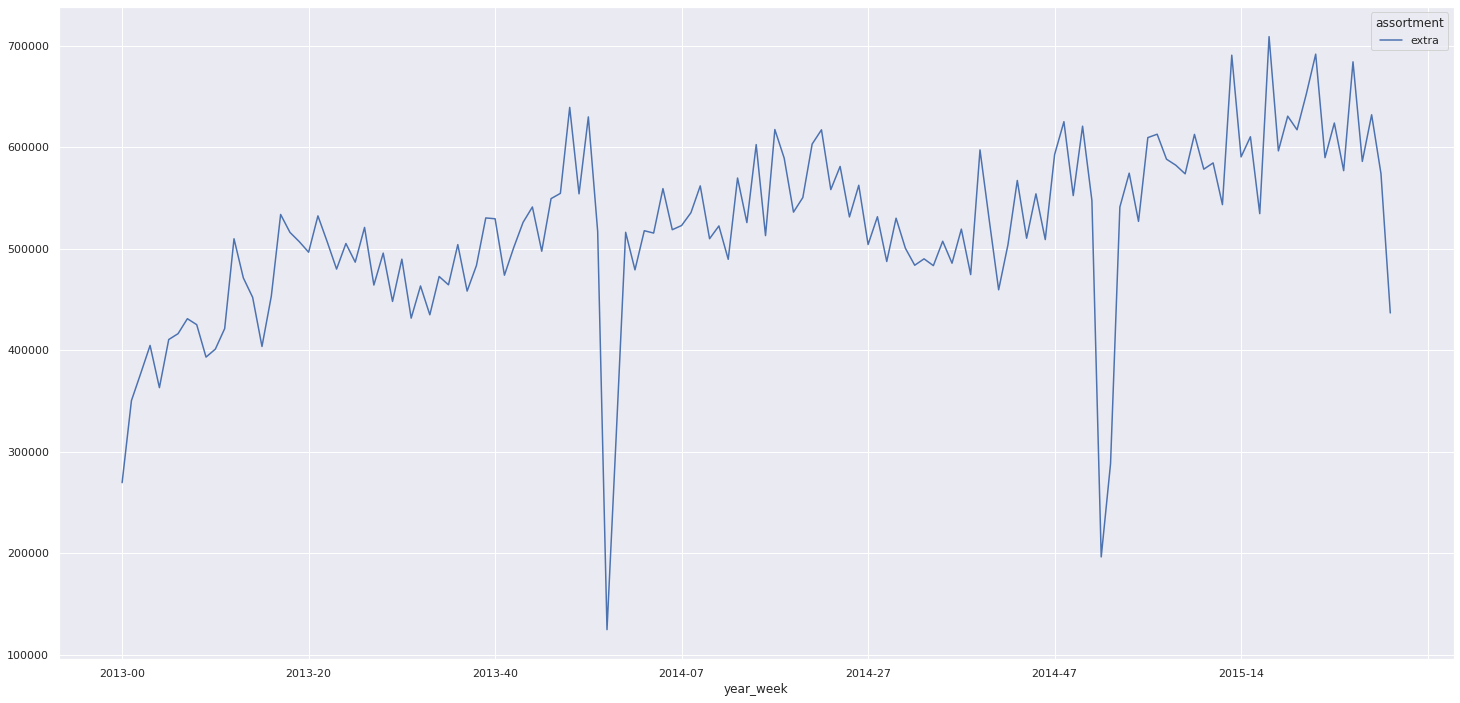

In [55]:
# plotando só o extra separadamente para entender o comportamento e verificar se a escala das outras duas categorias não
# distorceu o comportamento desta
aux4 = aux2[aux2['assortment'] == 'extra']
aux4 = aux4.pivot( index='year_week', columns='assortment', values='sales' )
aux4.plot()

### H2. Lojas com competidores mais próximos deveriam vender menos
***FALSA** Lojas com COMPETIDORES MAIS PRÓXIMOS vendem MAIS

In [56]:
aux1 = df4[['competition_distance', 'sales']].groupby( 'competition_distance' ).sum().reset_index()

# criando bins para diminuir a granularidade do gráfico
bins = list(np.arange(0,20000,1000))
aux1['competition_distance_binned'] = pd.cut( aux1['competition_distance'], bins=bins )
aux1.sample(4)

,competition_distance,sales,competition_distance_binned
311,4180.0,10918522,"(4000, 5000]"
51,530.0,2845461,"(0, 1000]"
340,4840.0,5167478,"(4000, 5000]"
31,330.0,33372005,"(0, 1000]"


In [57]:
aux2 = aux1[['competition_distance_binned', 'sales']].groupby( 'competition_distance_binned' ).sum().reset_index()

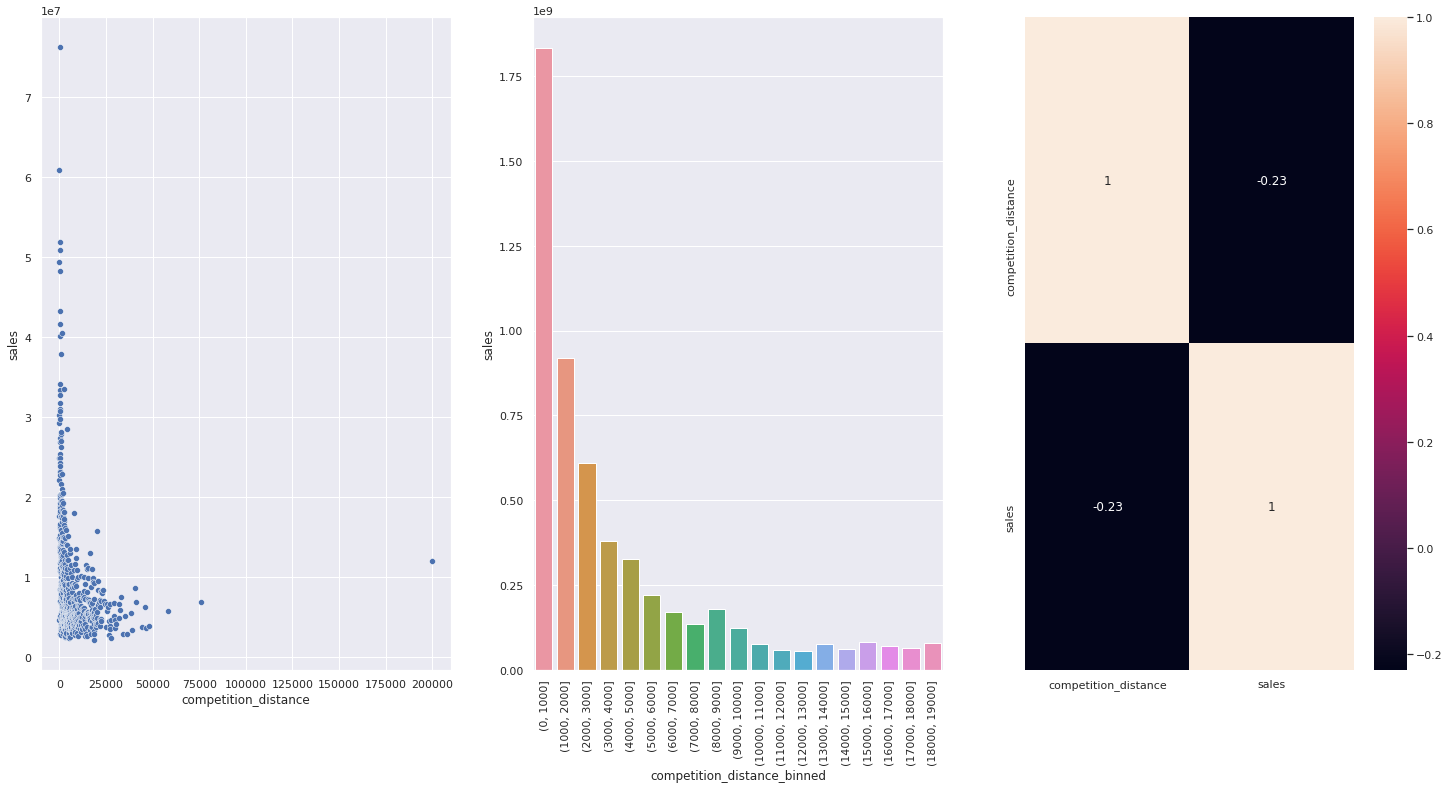

In [58]:
plt.subplot( 1,3,1 )
# para dados muito granulares, o scatterplot também é bastante útil
aux1 = df4[['competition_distance', 'sales']].groupby( 'competition_distance' ).sum().reset_index()
sns.scatterplot( x='competition_distance', y='sales', data=aux1 );

plt.subplot( 1,3,2 )
sns.barplot( x='competition_distance_binned', y='sales', data=aux2 );
plt.xticks( rotation=90 )

plt.subplot( 1,3,3 )
# gráfico que mede a correlação entre as variáveis envolvidas
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

### H3. Lojas com competidores a mais tempo deveriam vender mais
***FALSA** Lojas com COMPETIDORES A MAIS TEMPO vendem MENOS

<AxesSubplot:xlabel='competition_open_since_month', ylabel='sales'>

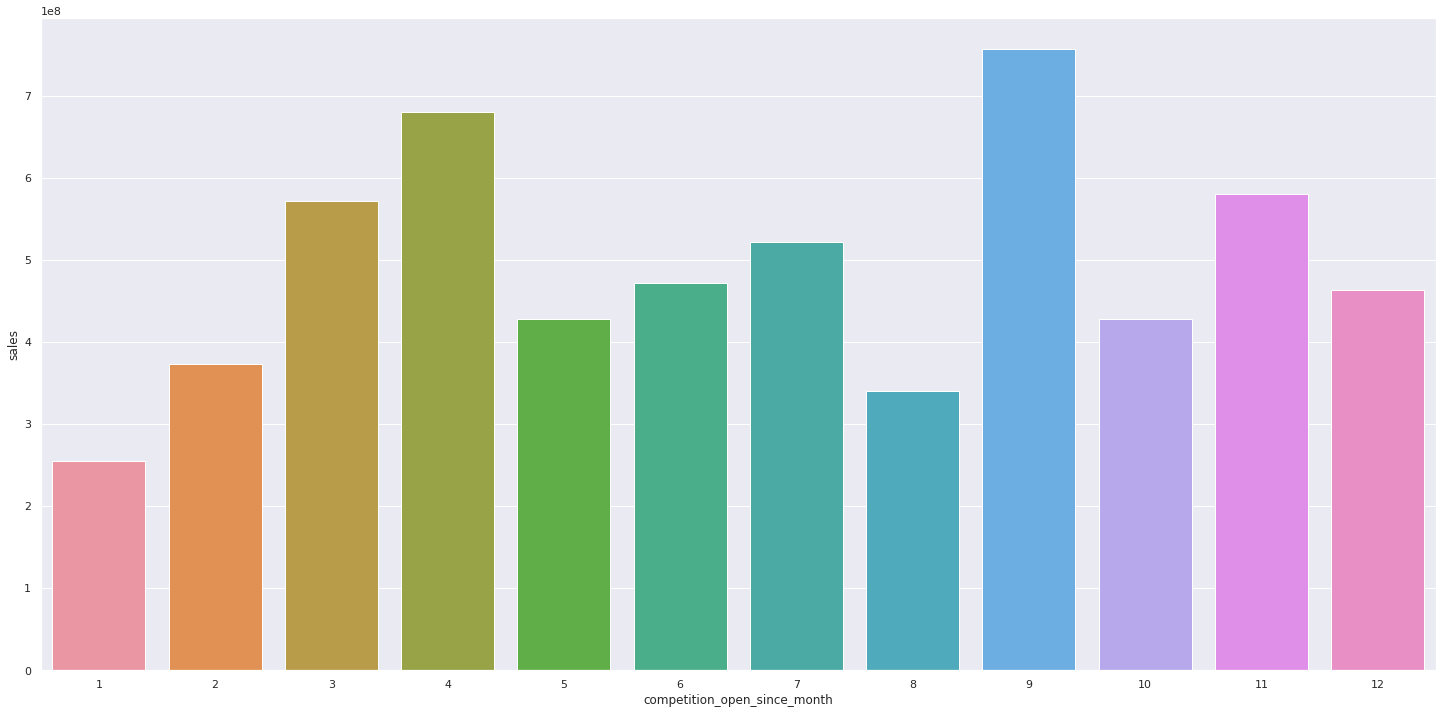

In [59]:
aux1 = df4[['competition_open_since_month','sales']].groupby( 'competition_open_since_month' ).sum().reset_index()
sns.barplot( x='competition_open_since_month', y='sales', data=aux1 )

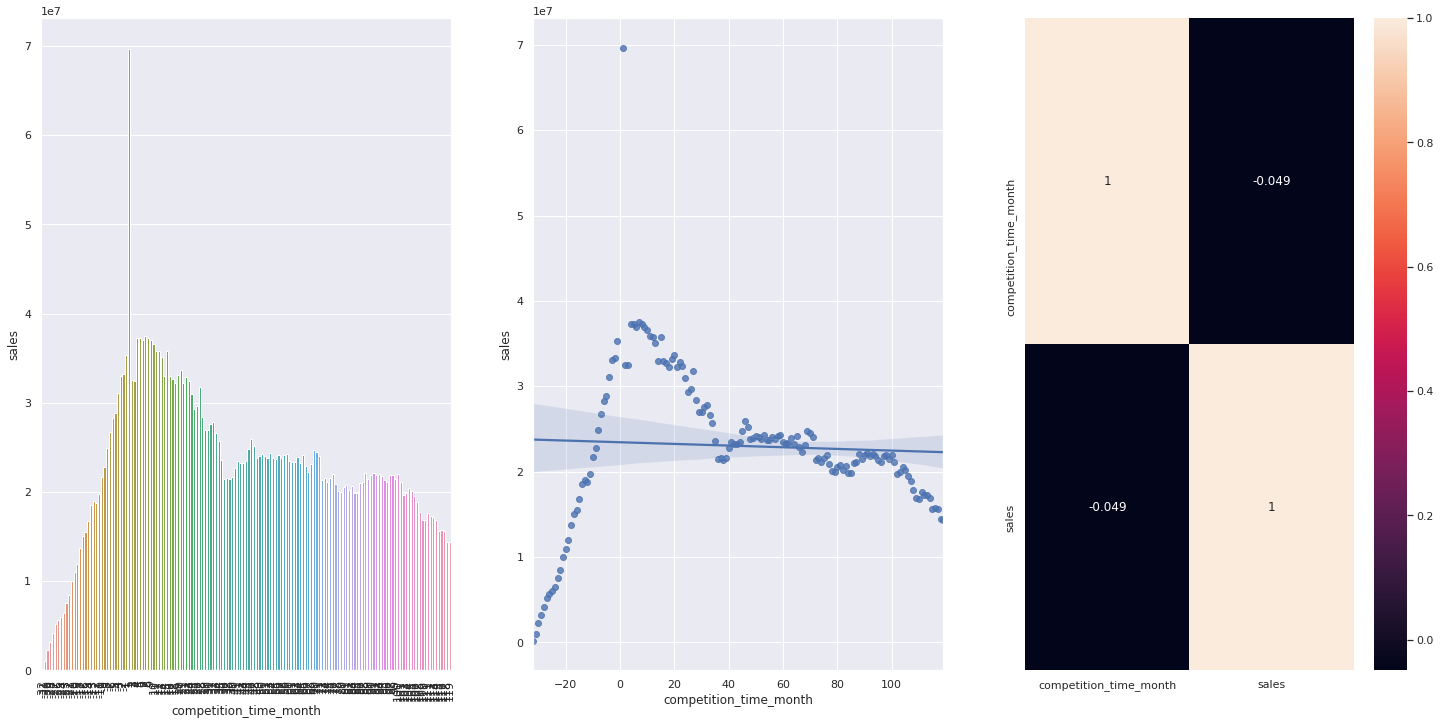

In [60]:
plt.subplot( 1,3,1 )
aux1 = df4[['competition_time_month','sales']].groupby( 'competition_time_month' ).sum().reset_index()
# fazendo um filtro para diminuir a granularidade do dados
aux2 = aux1[(aux1['competition_time_month'] < 120) & (aux1['competition_time_month'] != 0)]
sns.barplot( x='competition_time_month', y='sales', data=aux2 )
plt.xticks( rotation=90 );

plt.subplot( 1,3,2 )
sns.regplot( x='competition_time_month', y='sales', data=aux2 );

plt.subplot( 1,3,3 )
sns.heatmap( aux2.corr( method='pearson' ), annot=True );

### **H4.** Lojas com promoções ativas por mais tempo deveriam vender mais.
***FALSA** Lojas com CPROMOÇÕES ATIVAS POR MAIS TEMPO, depois de um certo período vendem MENOS

In [61]:
df4.head()

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,1,regular_day,1,c,basic,1270.0,9,2008,0,31,2015,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,1,regular_day,1,a,basic,570.0,11,2007,1,13,2010,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,1,regular_day,1,a,basic,14130.0,12,2006,1,14,2011,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1,regular_day,1,c,extended,620.0,9,2009,0,31,2015,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,1,regular_day,1,a,basic,29910.0,4,2015,0,31,2015,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


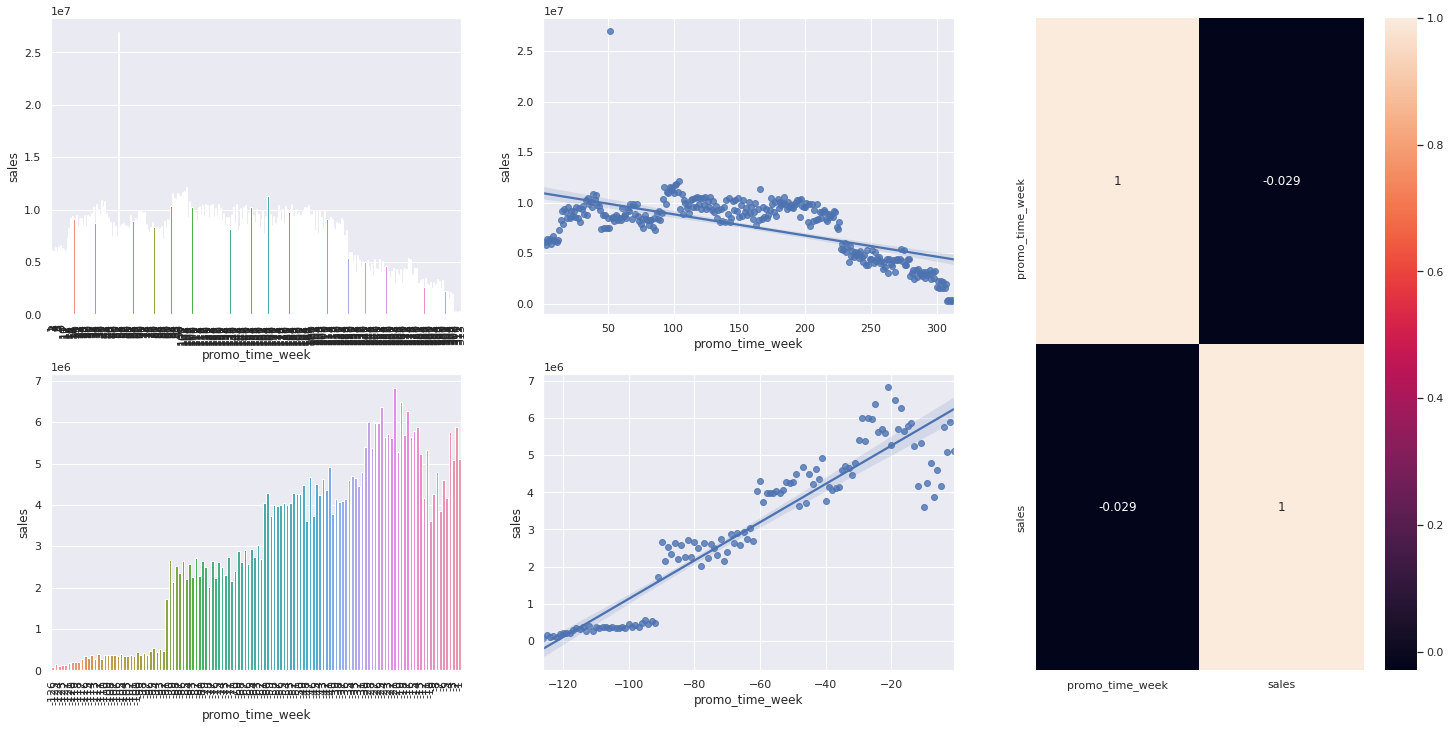

In [62]:
# dimensão de cada linha é uma venda
# hipóteses sobre as dimensões dos dados, pois não sabemos ao certo a documentação dos dados
# existe o período tradicional de promoção ('promo')
# e o período extendido ('promo2')
# a data exata em que começa o período extendido, 'promo_time_week' é usada para calcular o 'promo2_since_*'
# data venda - data início promo2 = 'promo2_since_week' e 'promo2_since_year'
# promo_time_week negativo, significa que foi no período tradicional,  
# se for positivo, está no período extendido, pois a data da venda é posterior ao início do período extendido

aux1 = df4[['promo_time_week','sales']].groupby( 'promo_time_week' ).sum().reset_index()

grid = GridSpec( 2,3 )

plt.subplot( grid[0,0])
aux2 = aux1[aux1['promo_time_week'] > 0] # promo extendido
sns.barplot( x='promo_time_week', y='sales', data=aux2 );
plt.xticks( rotation=90 );

plt.subplot( grid[0,1] )
sns.regplot( x='promo_time_week', y='sales', data=aux2 );

plt.subplot( grid[1,0] )
aux3 = aux1[aux1['promo_time_week'] < 0] # promo regular
sns.barplot( x='promo_time_week', y='sales', data=aux3 );
plt.xticks( rotation=90 );

plt.subplot( grid[1,1] )
sns.regplot( x='promo_time_week', y='sales', data=aux3 );

plt.subplot( grid[:,2] )
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

### <s>**H5.** Lojas com mais dias de promoção deveriam vender mais.</s>

demandaria mais uma passada de engenharia de uma feature para poder validar essa hipótese. Vamos deixar para o próximo ciclo do CRISP-DS.
Além disso ela é muito similar à hipótese anterior.

### **H7.** Lojas com mais promoções consecutivas deveriam vender mais.
***FALSA** Lojas com MAIS PROMOÇOES CONSECUTIVAS, vendem MENOS.

In [63]:
# 'promo' indica se a loja está no período tradicional promoção.
# 'promo2' indica se a loja está no período extendido promoção.
df4[['promo','promo2','sales']].groupby( ['promo','promo2'] ).sum().reset_index()

,promo,promo2,sales
0,0,0,1482612096
1,0,1,1289362241
2,1,0,1628930532
3,1,1,1472275754


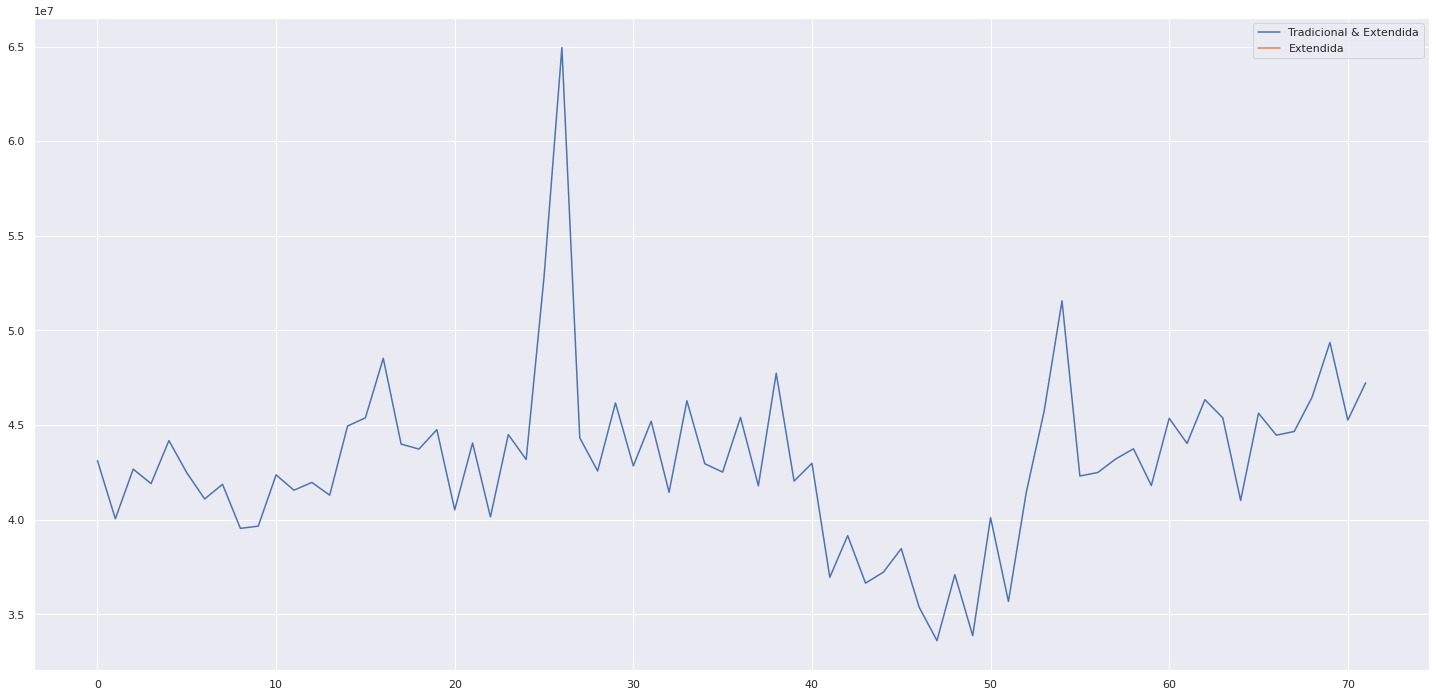

In [64]:
# periodo promo regular e extendido
aux1 = df4[(df4['promo'] == 1) & (df4['promo'] == 1)][['year_week','sales']].groupby( 'year_week' ).sum().reset_index()
ax = aux1.plot()

# periodo promo extendido apenas
aux2 = df4[(df4['promo'] == 1) & (df4['promo'] == 0)][['year_week','sales']].groupby( 'year_week' ).sum().reset_index()
aux2.plot(ax=ax)

ax.legend( labels=['Tradicional & Extendida','Extendida'] );

### **H8.** Lojas abertas durante o feriado de Natal deveriam vender mais.
***FALSA** Lojas abertas durante o feriado do Natal, vendem MENOS.

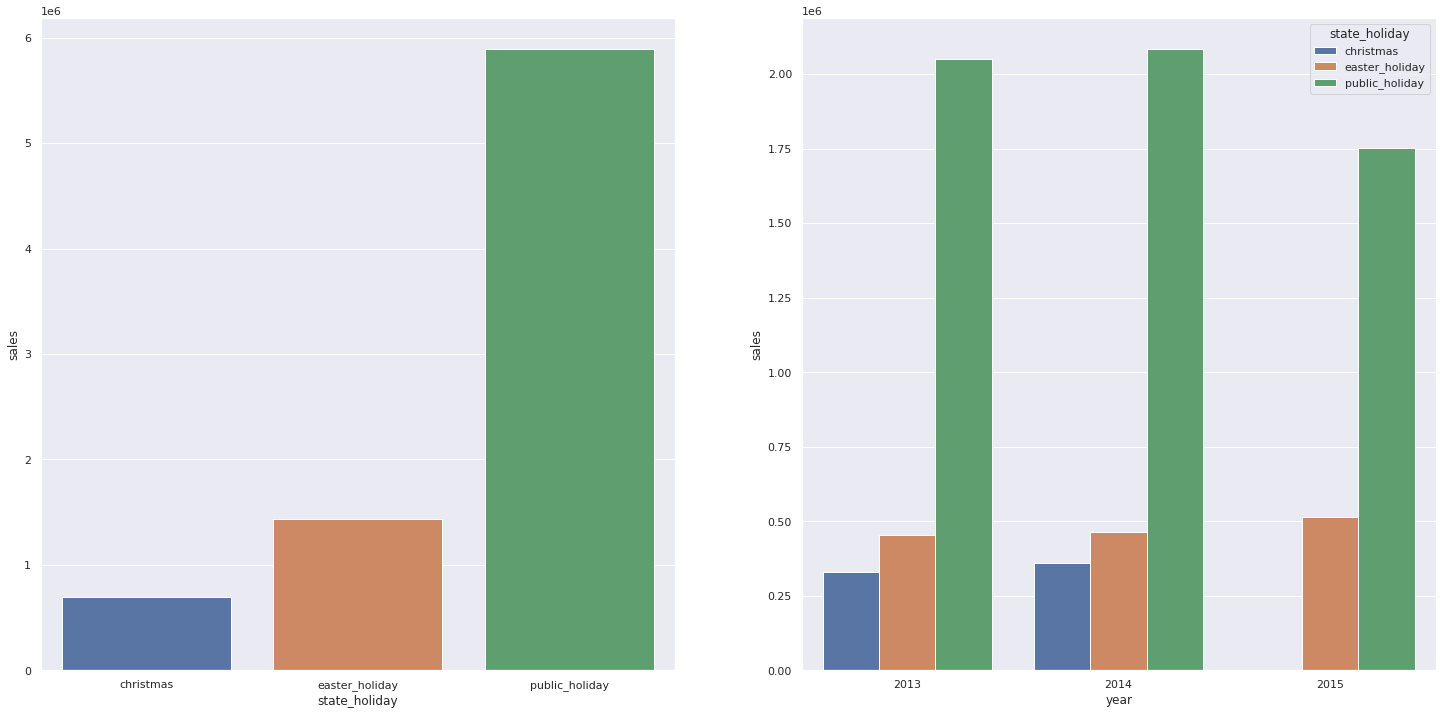

In [69]:
# retirando os dias normais pois eles são muito mais volumosos e vão distorcer a visualização.
aux = df4[df4['state_holiday']!='regular_day']

plt.subplot(1,2,1)
aux1=aux[['state_holiday', 'sales']].groupby('state_holiday').sum().reset_index()
sns.barplot(x='state_holiday',y='sales',data=aux1);

plt.subplot(1,2,2)
aux2=aux[['year','state_holiday','sales']].groupby(['year','state_holiday']).sum().reset_index()
sns.barplot(x='year',y='sales',hue='state_holiday',data=aux2);

### **H9.** Lojas deveriam vender mais ao longo dos anos.
***FALSA** Lojas vendem MENOS ao longo dos anos.

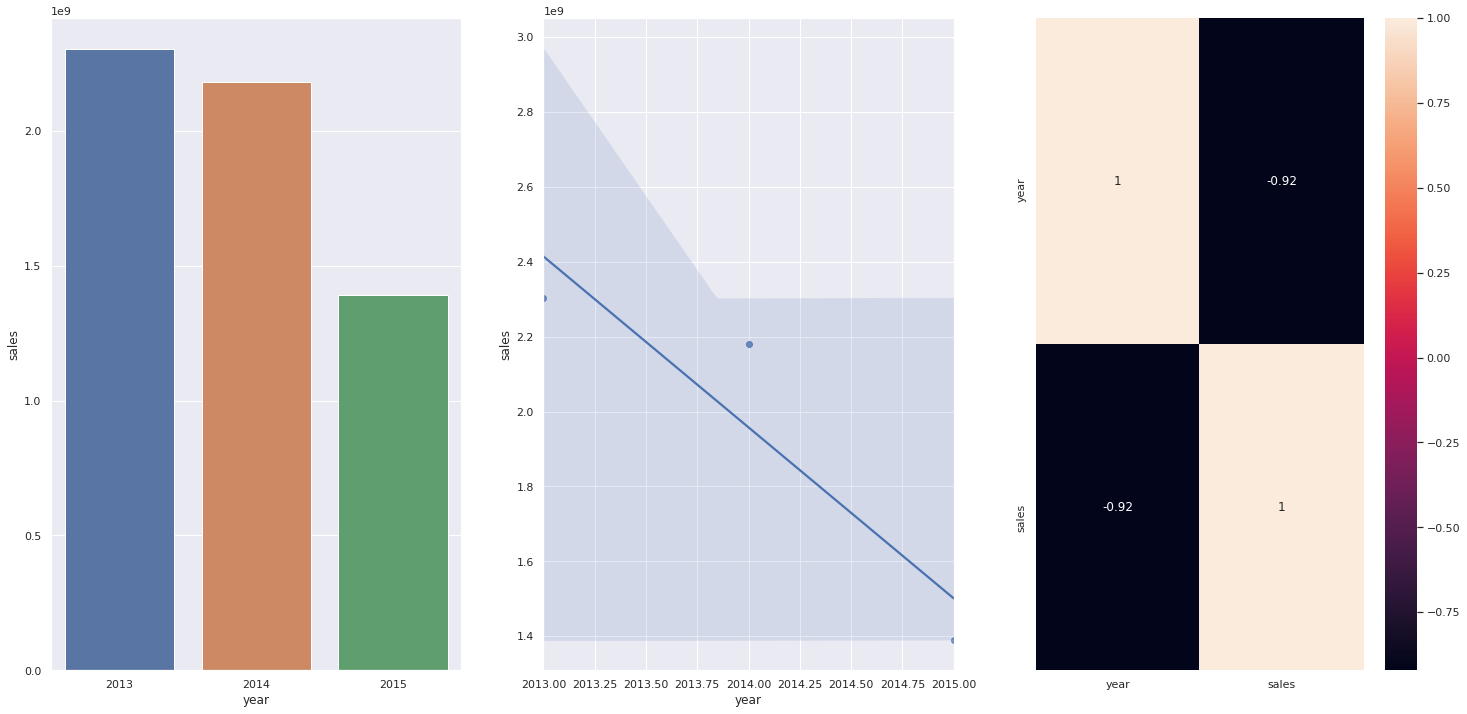

In [71]:
aux1=df4[['year','sales']].groupby('year').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot(x='year',y='sales',data=aux1);

plt.subplot(1,3,2)
sns.regplot(x='year',y='sales',data=aux1);

plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method='pearson'),annot=True);

Há uma correlação negativa muito forte, indicando que o ano é um atributo importante para o modelo. Porém não é um insight, pois já é algo que possivelmente já é acompanhado corriqueiramente na empresa,

### **H10.** Lojas deveriam vender mais no segundo semestre do ano.
***FALSA** Lojas vendem MENOS no segundo semestre.

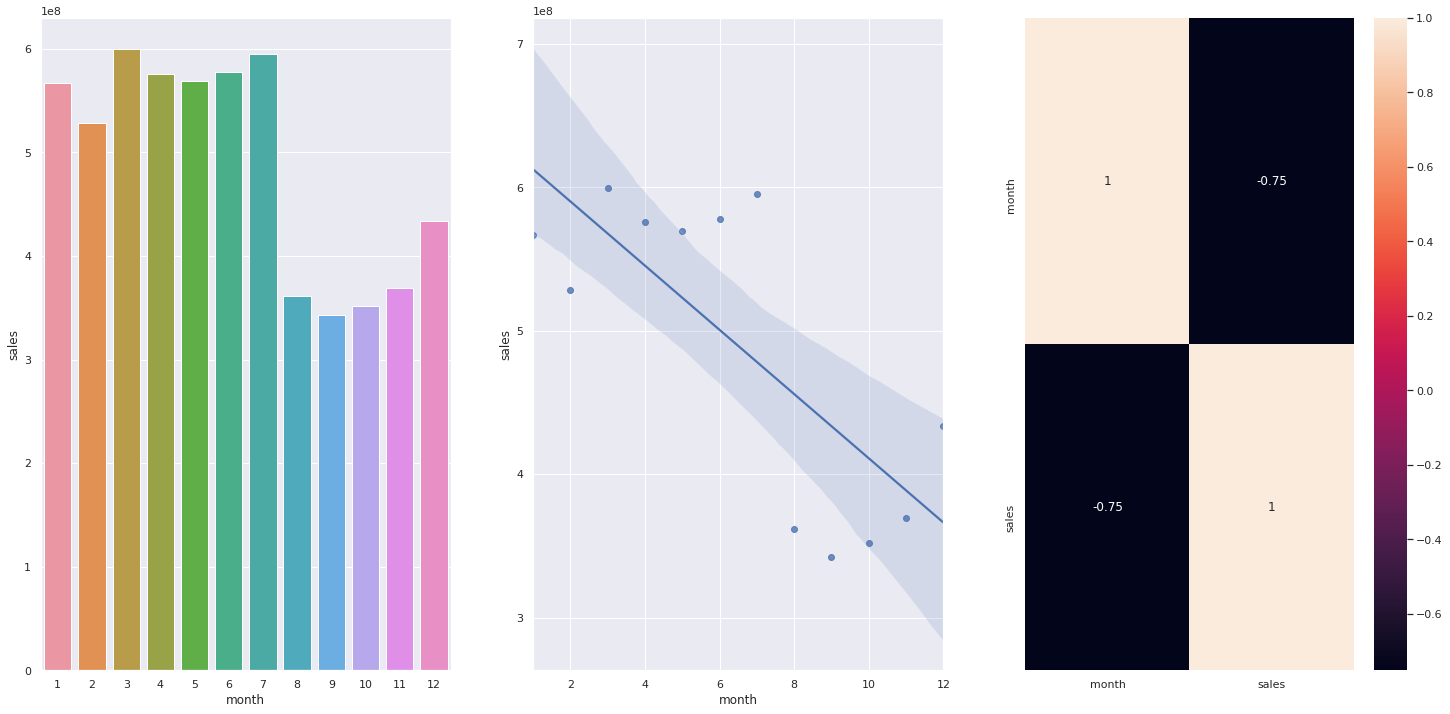

In [72]:
aux1=df4[['month','sales']].groupby('month').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot(x='month',y='sales',data=aux1);

plt.subplot(1,3,2)
sns.regplot(x='month',y='sales',data=aux1);

plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method='pearson'),annot=True);

### **H11.** Lojas deveriam vender mais depois do dia 10 de cada mês.
***FALSA** Lojas com MAIS PROMOÇOES CONSECUTIVAS, vendem MENOS.

In [74]:
aux1['before_after']=aux1['day'].apply(lambda x:'before_10days' if x <= 10 else 'after_10days')
aux1.head()

,day,sales,before_after
0,1,155983560,before_10days
1,2,233513169,before_10days
2,3,194582812,before_10days
3,4,228301010,before_10days
4,5,212869176,before_10days


KeyError: "['before_after'] not in index"

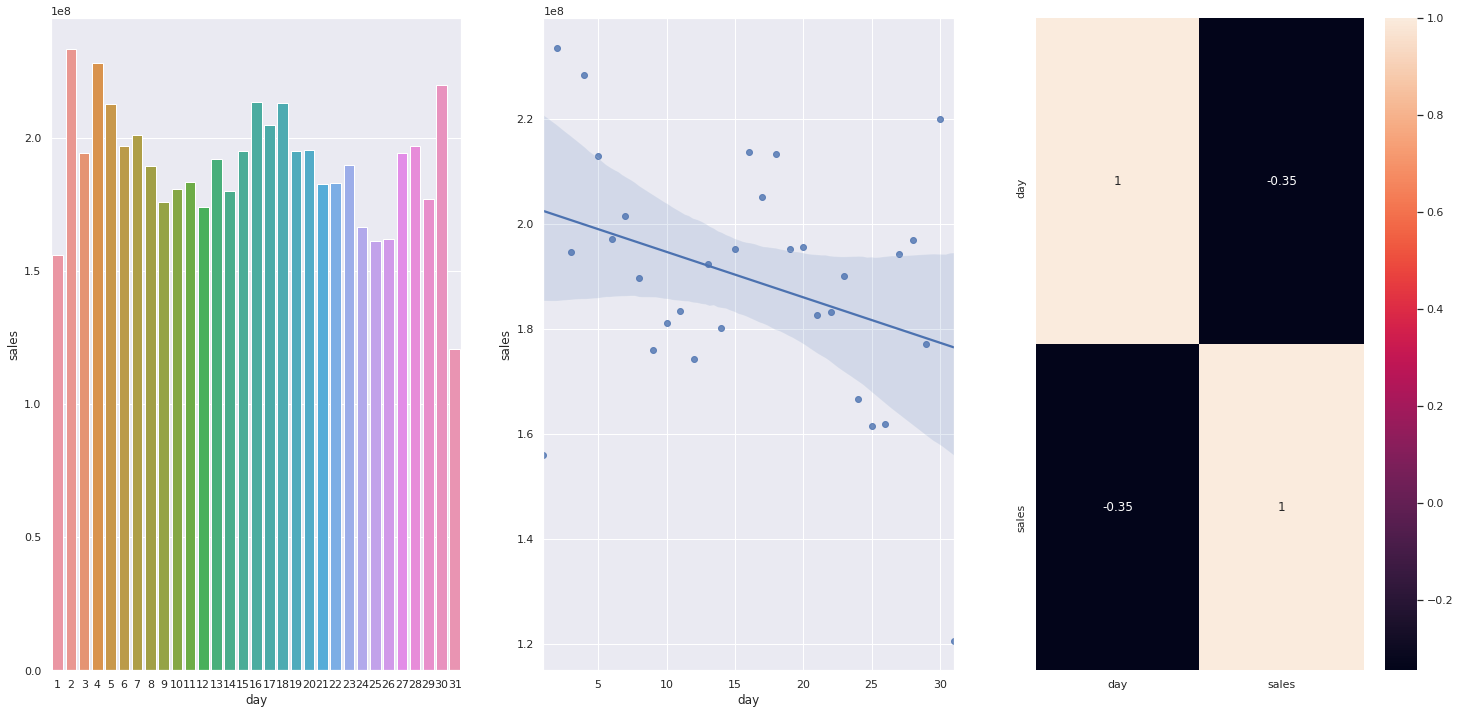

In [75]:
aux1=df4[['day','sales']].groupby('day').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot(x='day',y='sales',data=aux1);

plt.subplot(1,3,2)
sns.regplot(x='day',y='sales',data=aux1);

plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method='pearson'),annot=True);

aux2=aux1[['before_after','sales']].groupby('before_after').sum().reset_index()

### **H12.** Lojas deveriam vender menos aos finais de semana.
***FALSA** Lojas com MAIS PROMOÇOES CONSECUTIVAS, vendem MENOS.

### **H13.** Lojas deveriam vender menos durante os feriados escolares.
***FALSA** Lojas com MAIS PROMOÇOES CONSECUTIVAS, vendem MENOS.

## 4.3 Análise Multivariada

In [ ]:
df4.to_pickle('df4.pkl')